# Indicateurs énergétiques – Gaz naturel – Ensembles de données et méthodologies


## Importance des données sur l’énergie:
L’existence de données fiables permet au gouvernement, aux acteurs du secteur et au public canadien de mener des discussions et de prendre des décisions éclairées. Ces données jouent un rôle de premier plan en ce qui a trait au renforcement de la confiance du public, de la compétitivité économique et de la capacité du gouvernement à appuyer la transition vers une économie sobre en carbone.

## Aperçu de l’information sur l’énergie au Canada:
L’information sur l’énergie comprend des statistiques, des données, des analyses et des projections liées à la production, la transformation, la distribution et l’utilisation d’énergie, ainsi qu’à l’interrelation entre l’énergie et l’économie, et la société et l’environnement.

Le système d’information sur l’énergie du Canada est le fruit de la contribution de plusieurs organisations, dont les suivantes :


- quatre ministères et organismes fédéraux;  
 - Ressources naturelles Canada [(lien)](https://www.rncan.gc.ca/accueil);  
 - Statistique Canada [(lien)](https://www.statcan.gc.ca/fra/debut);  
 - Environnement et Changement climatique Canada [(lien)](https://www.canada.ca/fr/environnement-changement-climatique.html);  
 - Régie de l’énergie du Canada [(lien)](https://www.cer-rec.gc.ca/index-fra.html);  
- des ministères, organismes de réglementation et régies de services publics provinciaux et territoriaux;  
- des intervenants sur le marché de l’énergie (p. ex.  , producteurs d’énergie, sociétés pipelinières et exploitants de réseaux);
- des associations du secteur et organismes de recherche universitaires;  
- le site Web du gouvernement ouvert du Canada [(lien)](https://open.canada.ca/fr);  
- __le Portail canadien d’information sur l’énergie (lancé en juin 2019) [(lien)](https://www.statcan.gc.ca/fra/themes-debut/energie).__

## Portail canadien d’information sur l’énergie
En juin 2019, le gouvernement du Canada a lancé le Portail canadien d’information sur l’énergie [(lien)](https://www.statcan.gc.ca/fra/themes-debut/energie). Ce portail est un guichet unique pour l’information sur l’énergie qui procure un point d’accès à toutes les statistiques du gouvernement du Canada et propose des liens vers un vaste éventail de produits d’information sur l’énergie.

Bien que l’information sur l’énergie au Canada abonde, il peut être difficile de s’y retrouver, de l’interpréter et de la vérifier, en particulier pour les profanes. De plus, la mesure des données, les définitions et les normes de présentation de l’information varient d’un fournisseur d’information à l’autre. Il arrive souvent que les données ne soient pas accessibles dans des formats structurés et lisibles par machine. Enfin, les données ne sont souvent pas publiées en temps opportun et les délais sont considérés comme trop longs, compte tenu de la demande croissante d’information en temps réel.


## Objectif du présent bloc-notes 

•1)  Déterminer les principaux ensembles de données présentés dans les [indicateurs énergétiques sur le marché du gaz naturel canadien](https://www.cer-rec.gc.ca/nrg/tl/nrgcmmdt/nrgndctrlctrct-fra.html);  
•2) Téléverser chaque ensemble de données utilisé dans les indicateurs énergétiques dans le bloc-notes Jupyter;  
•3) Faire un graphique pour chaque ensemble de données;  
•4) Fournir des liens vers d’autres ensembles de données accessibles au public aux fins d’analyse plus poussée.


__Les ensembles de données utilisés dans les indicateurs énergétiques viennent de multiples sources publiques accessibles gratuitement. Les fichiers des ensembles de données comme tels ne sont pas fournis pour accompagner le bloc-notes. Les données sont plutôt téléversées directement dans le bloc-notes par le fournisseur. Cela assure la transparence, la reproductibilité et le caractère opportun pour les utilisateurs. __


__Les ensembles de données utilisés dans ce bloc-notes ne sont généralement pas dans un format bidimensionnel lisible par machine. De plus, les unités de mesure entre les divers ensembles de données ne sont pas normalisées. Ainsi, pour qu’ils présentent une valeur analytique, les ensembles de données du bloc-notes sont transformés et normalisés afin d’assurer leur comparabilité.__


Dans le cas des unités qui ne figurent pas dans ce bloc-notes, la Régie de l’énergie du Canada présente sur son site Web des tables de conversion d’unités d’énergie [(lien)](https://apps.cer-rec.gc.ca/Conversion/conversion-tables.aspx?GoCTemplateCulture=fr-CA).

In [34]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup as bs
import zipfile
import io
import re
import requests
from matplotlib import pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

from pyxlsb import open_workbook
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
import altair as alt
import datetime

# établir les paramètres globaux
sns.set_palette(sns.color_palette("tab20", 20))
register_matplotlib_converters()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Indicateurs énergétiques – Gaz naturel

### Prix du gaz naturel

#### 1) Principal ensemble de données
Le gaz naturel est commercialisé partout dans le monde, dans un marché intégré et très développé. Le gaz peut être négocié entre acheteurs et vendeurs aux fins de livraison immédiate ou à court terme (au prix du disponible) ou de livraison à terme (au prix à terme). Le prix du disponible et le prix à terme peuvent varier selon les attentes immédiates et futures relativement aux conditions du marché. Contrairement au pétrole brut, qui présente différentes qualités, le gaz naturel est un produit fongible. 

Le prix du disponible [(lien)](https://www.eia.gov/dnav/ng/hist/rngwhhdD.htm) et le prix à terme [(lien)](https://www.eia.gov/dnav/ng/hist/rngc1d.htm) du gaz naturel sont établis par l’Energy Information Administration (« EIA ») des États-Unis et sont mis à jour quotidiennement. 


En Alberta, les prix du gaz naturel sont publiés par le gouvernement de l’Alberta [(lien)](https://economicdashboard.alberta.ca/NaturalGasPrice).

#### 2) Téléverser l’ensemble de données

In [35]:
# télécharger le prix du disponible au carrefour Henry selon l’EIA
url_hh = 'https://www.eia.gov/dnav/ng/hist_xls/RNGWHHDm.xls'
sheet_hh = 'Data 1'
df_hh = pd.read_excel(url_hh, sheet_name=sheet_hh, index_col=None, header=2, parse_dates=['Date'])
df_hh['Date'] = df_hh['Date'].values.astype('datetime64[M]')
df_hh.set_index('Date', inplace=True)
df_hh['Henry Hub (US$/GJ)'] = df_hh['Henry Hub Natural Gas Spot Price (Dollars per Million Btu)'] * 1.05505585

# télécharger le taux de change ($ CAN/$ US) de la Réserve fédérale américaine
url_fed = 'https://www.federalreserve.gov/releases/h10/hist/dat00_ca.htm'
df_fed = pd.read_html(url_fed, index_col=['Date'], header=0, parse_dates=['Date'])[0]
df_fed['Rate'] = pd.to_numeric(df_fed['Rate'], errors='coerce')
df_fed = df_fed.resample('MS').mean()

# nous utilisons le taux de change de la Réserve fédérale (ci-dessus) mais le taux de change de la Banque du Canada est une autre option
# télécharger le taux de change ($ CAN/$ US) de la Banque du Canada
# url_boc = 'https://www.bankofcanada.ca/valet/observations/FXUSDCAD/csv'
# df_boc = pd.read_csv(url_boc, index_col=['date'], header=6, parse_dates=['date'])
# df_boc = df_boc.resample('MS').mean()
# df_boc.index.rename('Date', inplace=True)

# accéder aux prix du gaz naturel en Alberta
url_ab = 'https://economicdashboard.alberta.ca/Download/DownloadFile?extension=csv&requestUrl=https%3A%2F%2Feconomicdashboard.alberta.ca%2Fapi%2FOilPrice'
df_ab = pd.read_csv(url_ab, index_col='When', header=0, parse_dates=['When']).rename(columns={'Alberta':'Alberta (CN$/GJ)'})
df_ab.index.rename('Date', inplace=True)
df_ab = df_ab[df_ab['Type'] == 'NatGas'][['Alberta (CN$/GJ)']]

# fusionner tous les prix et taux de change
df_prices = df_hh.merge(df_ab, on ='Date', how = 'left').merge(df_fed, how='left', on='Date')
df_prices['Henry Hub (CN$/GJ)'] = df_prices['Henry Hub (US$/GJ)'] * df_prices['Rate']
df_prices = df_prices[df_prices.index.year >= 2016][['Alberta (CN$/GJ)', 'Henry Hub (CN$/GJ)']]

#### 3) Faire un graphique pour l’ensemble de données

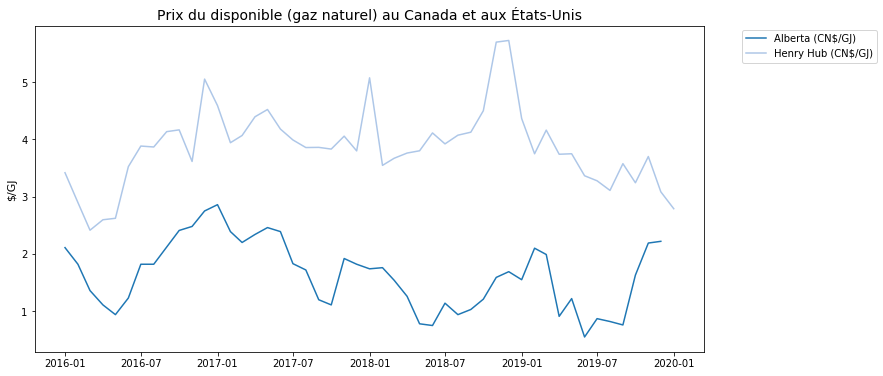

In [36]:
fig, (ax1) = plt.subplots(ncols=1, nrows=1, figsize=(12,6))

ax1.plot(df_prices.index, df_prices)
ax1.set_ylabel('$/GJ', fontsize=11)
ax1.set_title('Prix du disponible (gaz naturel) au Canada et aux États-Unis', fontsize=14)
ax1.legend(df_prices.columns, fontsize=10, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.4);

#### 4) Autres ensembles de données liés au prix du gaz naturel canadien

Les prix du gaz naturel pour les clients canadiens sont aussi fixés par les sociétés de distribution locales de gaz naturel ou les régies de services publics provinciales. Les données sur les prix sont généralement présentées aux régies de services publics pour examen afin de garantir un approvisionnement en gaz sûr. 

•	En Alberta, les prix du gaz naturel sont établis par l’Alberta Utilities Commission [(lien)](http://www.auc.ab.ca/pages/current-rates-gas.aspx);  
•	En Colombie-Britannique, les prix du gaz naturel sont fixés par FortisBC [(lien)](https://www.fortisbc.com/accounts-billing/billing-rates/natural-gas-rates/residential-rates);  
•	En Saskatchewan, les prix du gaz naturel sont fixés par SaskEnergy [(lien)](https://www.saskenergy.com/residential/resrates_hist.asp);  
•	Au Manitoba, les prix du gaz naturel sont établis par la Régie des services publics du Manitoba [(lien)](http://www.pubmanitoba.ca/v1/regulated-utilities/natural-gas/rates/s_supply.html);  
•	En Ontario, les prix du gaz naturel sont établis par la Commission de l’énergie de l’Ontario [(lien)](https://www.oeb.ca/fr/tarifs-et-votre-facture/tarifs-du-gaz-naturel);  
•	Au Québec, les prix du gaz naturel sont fixés par Énergir [(lien)](https://www.energir.com/fr/affaires/prix/prix-du-gaz/);  
•	Au Nouveau-Brunswick, les prix du gaz naturel sont fixés par Enbridge Gas New Brunswick [(lien)](https://naturalgasnb.com/fr/votre-maison/comptes-et-facturation/notre-produit/#eug-rate-history);  
•	En Nouvelle-Écosse, les prix du gaz naturel sont fixés par Heritage Gas [(lien)](http://www.heritagegas.com/natural-gas/historical-rates/).


### Production de gaz naturel

#### 1) Principal ensemble de données

Les données sur la production de gaz naturel sont recueillies par les gouvernements provinciaux et sont utilisées pour déterminer le montant des redevances à percevoir ou appuyer les mandats de réglementation. La Régie regroupe les statistiques des gouvernements provinciaux et publie le rapport intitulé Production de gaz naturel commercialisable au Canada [(lien)](https://www.cer-rec.gc.ca/nrg/sttstc/ntrlgs/stt/mrktblntrlgsprdctn-fra.html). Les données remontent jusqu’à 2000 et sont mises à jour chaque mois par la Régie. Les données provenant des gouvernements provinciaux peuvent être décalées de plus de six mois. La définition de « production commercialisable » varie selon les sources.

Plus précisément, la Régie regroupe les statistiques provinciales suivantes :

•	Gouvernement de la Colombie-Britannique – Rapport intitulé Production and distribution of Natural Gas in BC [(lien)](http://www2.gov.bc.ca/gov/content/industry/natural-gas-oil/statistics);
Production commercialisable = Sortie de l’usine de traitement de gaz résiduaire – Production de la Colombie-Britannique seulement

•	Alberta Energy Regulator – Rapport intitulé ST3: Alberta Energy Resource Industries Monthly Statistics [(lien)](https://aer.ca/providing-information/data-and-reports/statistical-reports/st3);
Production commercialisable = Production de puits + production de puits in situ – brûlé – rejeté – contraction

•	Gouvernement de la Saskatchewan – Rapport intitulé Natural Gas Volume and Value Summary [(lien)](http://publications.gov.sk.ca/details.cfm?p=89506);

Production commercialisable = Gaz disponible pour utilisation ou vente
•	Office Canada–Nouvelle-Écosse des hydrocarbures extracôtiers – Rapport intitulé Monthly Production Summary [(lien)](https://www.cnsopb.ns.ca/resource-library/weekly-activity-reports);
Production commercialisable = Production de gaz brut * 92,5

•	Gouvernement du Nouveau-Brunswick – Rapport intitulé Statistiques mensuelles de la production du pétrole et du gaz [(lien)](http://www2.gnb.ca/content/dam/gnb/Departments/en/pdf/Minerals-Minerales/Monthly_Statistics.pdf);

Production commercialisable = Gaz naturel
•	Statistique Canada [(CANSIM)](https://www150.statcan.gc.ca/t1/tbl1/fr/tv.action?pid=2510005501&request_locale=fr) – Rapport intitulé Approvisionnements et utilisations du gaz naturel, mensuel (lien);
Production commercialisable en Ontario = Données diffusées

•	Nord canadien :
o	Régie de l’énergie du Canada – Statistiques sur les régions pionnières (Nord) [(lien)](https://www.cer-rec.gc.ca/nrth/sttstc/index-fra.html);
o	Bureau des statistiques des Territoires du Nord-Ouest – Oil and gas [(lien)](https://www.statsnwt.ca/economy/oil-gas/).



#### 2) Téléverser l’ensemble de données 

In [37]:
# accéder aux données du rapport « Production de gaz naturel commercialisable au Canada » (publié par la Régie de l’énergie du Canada)

url_cer = 'https://www.cer-rec.gc.ca/nrg/sttstc/ntrlgs/stt/mrktblntrlgsprdctn-eng.html'  
sheet_prod = '2000+ - cubic feet per day'

r = requests.get(url_cer)
if r.status_code == 200:
    soup = bs(r.content, 'lxml')
    #  trouver l’ensemble de données le plus récent
    y = 0
    links = soup.find_all('a', attrs={'href': re.compile('^/nrg/sttstc/ntrlgs/stt/(.)*.xlsx?')})
    for link in links:
        new_y = int(link.get('href').split('.')[-2][-4:])
        if y < new_y:
            y = new_y
            url_prod = 'https://www.cer-rec.gc.ca' + link.get('href')
     
    df_prod = pd.read_excel(url_prod, sheet_name=sheet_prod, usecols='A:K', header=8, index_col=0, 
                            parse_dates=['Date']).dropna(1, 'all').dropna(0, 'all') / 1000
    df_prod.rename(columns={'NS':'Nova Scotia', 'NB':'New Brunswick', 'Sask':'Saskatchewan', 'BC':'British Columbia'}, 
                   inplace=True)
    df_prod = df_prod[df_prod.index.year >= 2016].dropna(0, 'any', subset=['Canada']).fillna(0)
else:
    print('Could not access CER page: ', url_cer)

#### 3) Faire un graphique pour l’ensemble de données

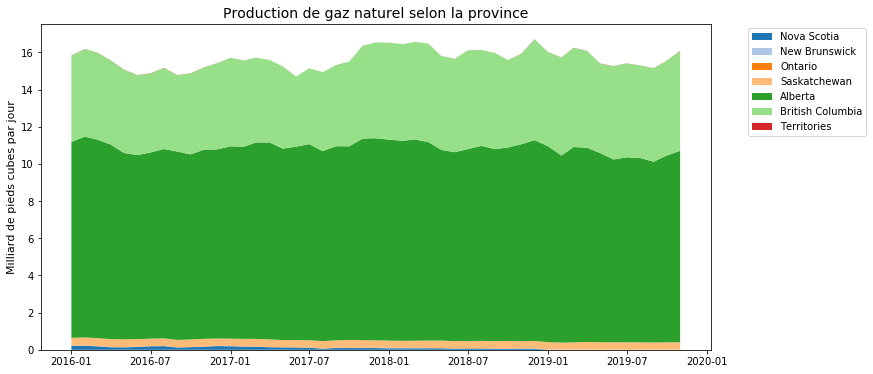

In [38]:
fig, (ax1) = plt.subplots(ncols=1, nrows=1, figsize=(12,6))

ax1.stackplot(df_prod.index, df_prod.drop('Canada', 1).T)
ax1.set_ylabel('Milliard de pieds cubes par jour', fontsize=11)
ax1.set_title('Production de gaz naturel selon la province', fontsize=14)
ax1.legend(df_prod.drop('Canada', 1).columns, fontsize=10, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.4);

L’Alberta est le plus important producteur de gaz naturel au Canada, suivi de la Colombie-Britannique et de la Saskatchewan. Mises ensemble, ces trois provinces produisent 99 % du gaz canadien. 

#### 4) Autres ensembles de données liés à la production de gaz naturel canadien


Le rapport intitulé Approvisionnements et utilisations du gaz naturel (tableau 25-10-0055-01) de Statistique Canada présente des données sur la production mensuelle de gaz naturel [(lien)](https://www150.statcan.gc.ca/t1/tbl1/fr/tv.action?pid=2510005501&request_locale=fr). Dans ce rapport, on utilise une méthode de calcul de la production de gaz commercialisable qui diffère de celle qui est employée par la Régie. Par conséquent, les données figurant dans les deux rapports ne sont pas identiques. Les volumes de production présentés dans le rapport Approvisionnements et utilisations du gaz naturel ont été établis en fonction de données administratives et d’enquêtes.

### Demande de gaz naturel
#### 1) Principal ensemble de données
Statistique Canada publie le rapport Approvisionnements et utilisations du gaz naturel (tableau CANSIM 25-10-0055-01) [(lien)](https://www150.statcan.gc.ca/t1/tbl1/fr/tv.action?pid=2510005501&request_locale=fr). Ce rapport mensuel présente des données relatives à la demande aux fins de consommation résidentielle, commerciale et industrielle selon la province.

#### 2)Téléverser l’ensemble de données

In [39]:
url_demand = 'https://www150.statcan.gc.ca/n1/tbl/csv/25100055-eng.zip'
file_name = '25100055.csv'
r = requests.get(url_demand, allow_redirects=True)
zip_file = zipfile.ZipFile(io.BytesIO(r.content))
df_demand_all = pd.read_csv(zip_file.open(file_name), index_col=None, header=0, parse_dates=['REF_DATE'])

# filtrer pour obtenir la demande pour utilisation finale en mètres cubes
keep = ['Residential consumption', 'Industrial consumption', 'Commercial consumption']
df_demand = df_demand_all[df_demand_all['Supply and disposition'].isin(keep) 
                          & (df_demand_all['UOM'] == 'Cubic metres')][['REF_DATE', 'GEO', 'Supply and disposition', 'VALUE']]

# nettoyer
df_demand['Value (Bcf/d)'] = df_demand['VALUE']/(df_demand['REF_DATE'].dt.daysinmonth) / 1000000 * 35.3147 
df_demand.rename(columns={'REF_DATE':'Date', 'GEO':'Region', 'Supply and disposition':'Category'}, inplace=True)
df_demand_prov = df_demand.pivot_table(index='Date', columns='Region', aggfunc=np.sum)['Value (Bcf/d)']
df_demand_prov.columns = df_demand_prov.columns.str.replace('Northwest Territories', 'Territories')

#### 3) Faire un graphique pour l’ensemble de données

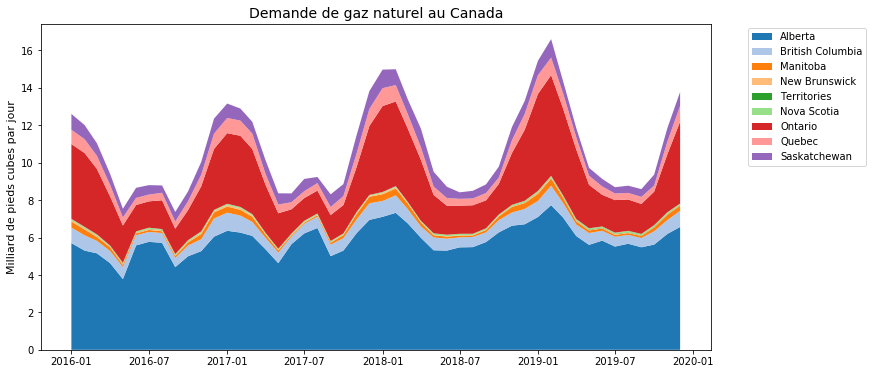

In [40]:
fig, (ax1) = plt.subplots(ncols=1, nrows=1, figsize=(12,6))

ax1.stackplot(df_demand_prov.index, df_demand_prov.drop('Canada', 1).T)
ax1.set_ylabel('Milliard de pieds cubes par jour', fontsize=11)
ax1.set_title('Demande de gaz naturel au Canada', fontsize=14)
ax1.legend(df_demand_prov.drop('Canada', 1).columns, fontsize=10, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.4);

La demande de gaz naturel au Canada est saisonnière. Elle est plus élevée en hiver, alors que le gaz naturel est utilisé pour le chauffage. Le secteur industriel est le plus important consommateur de gaz naturel au Canada. Le secteur comprend la production d’électricité, l’extraction et le raffinage de pétrole brut, les produits pétrochimiques et la fabrication. L’Alberta est le plus important consommateur de gaz naturel, suivi de l’Ontario et de la Saskatchewan.

#### 4) Autres ensembles de données liés à la demande de gaz naturel


Aucune donnée quotidienne en temps réel accessible au public sur la demande de gaz naturel n’est disponible.

Le gouvernement de la Colombie-Britannique publie un rapport mensuel sur la production et la distribution de gaz naturel, qui comprend les ventes à trois services de gaz, soit Fortis BC, Pacific Northern Gas et Pacific Northern Gas (NE). Des données sont disponibles pour quatre catégories de clients (résidentiels, commerciaux et industriels, et ventes directes) (lien).

L’Alberta Energy Regulator publie un rapport mensuel sur l’approvisionnement et l’utilisation du gaz naturel qui présente la demande à l’échelle provinciale selon la catégorie de client, la consommation par les grandes installations industrielles, les retraits et les injections [(lien)](https://www2.gov.bc.ca/assets/gov/farming-natural-resources-and-industry/natural-gas-oil/production-statistics/gasnew.xls).

Le bilan énergétique global intitulé Disponibilité et écoulement d'énergie primaire et secondaire en térajoules (tableau 25-10-0029-01) de Statistique Canada présente des données sur la demande annuelle de gaz naturel selon le secteur [(lien)](https://www150.statcan.gc.ca/t1/tbl1/fr/cv.action?pid=2510002901&request_locale=fr). Ce rapport renferme des données en unités d’énergie (térajoules) qui permettent de faire des comparaisons entre les combustibles et un cumul. Statistique Canada publie également le rapport intitulé Disponibilité et écoulement d'énergie primaire et secondaire en unités naturelles (tableau 25-10-0030-01) [(lien)](https://www150.statcan.gc.ca/t1/tbl1/fr/tv.action?pid=2510003001&request_locale=fr).

Ce rapport renferme les mêmes données, mais en unités naturelles, qui varient selon le type d’énergie (litres pour les combustibles liquides, GWh pour l’électricité, etc.), ce qui fait qu’elles ne peuvent pas toujours être cumulées ni comparées directement selon le type de combustible [(lien)](https://www150.statcan.gc.ca/t1/tbl1/fr/tv.action?pid=2510003001&request_locale=fr).

La demande annuelle de gaz naturel selon la province et le secteur est présentée dans le rapport sur l’avenir énergétique de la Régie [(lien)](http://www.cer-rec.gc.ca/nrg/ntgrtd/ftr/2016/index-fra.html). Statistique Canada et la Régie utilisent des méthodes différentes pour calculer la demande annuelle de gaz naturel. 

La Base de données complète sur la consommation d’énergie de Ressources naturelles Canada renferme des données détaillées sur la demande de gaz naturel et d’autres produits énergétiques. La base de données présente un aperçu de la consommation d’énergie au Canada selon le secteur (commercial, résidentiel, industriel, transport et agriculture) et dans chaque région du pays [(lien)](http://oee.nrcan.gc.ca/organisme/statistiques/bnce/apd/menus/evolution/tableaux_complets/liste.cfm).

Les sociétés pipelinières canadiennes publient quotidiennement des rapports sommaires sur le gaz sur leurs sites Web qui regroupent les commandes quotidiennes des utilisateurs de pipelines. Un examen de ces données pourrait donner une idée de la demande quotidienne de gaz naturel dans une région précise. Les grands pipelines à l’égard desquels des rapports sommaires sur le gaz sont publiés quotidiennement comprennent les suivants :   
•	Réseau principal de TransCanada [(lien)](http://www.tccustomerexpress.com/2878.html);  
•	Pipeline de Nova Gas Transmission [(lien)](http://www.tccustomerexpress.com/2878.html);  
•	Pipeline de Westcoast [(lien)](https://noms.wei-pipeline.com/customer-activities/pipeline.php);  
•	Pipeline d’Union Gas [(lien)](https://www.uniongas.com/storage-and-transportation/informational-postings/gas-day-summary);  
•	Pipeline de TransGas [(lien)](https://www.transgas.com/infopostings/apps/DailyOpsDetail.aspx).

### Exportations de gaz naturel
#### 1) Principal ensemble de données

Le Canada produit beaucoup plus de gaz naturel qu’il n’en faut pour satisfaire ses besoins. Le gaz naturel disponible est exporté vers les États-Unis par pipeline. La Régie de l’énergie du Canada réglemente les importations et les exportations de gaz naturel et recueille des statistiques sur les importations et les exportations auprès des utilisateurs de pipelines. Cette information est accessible à partir du Système de suivi des produits de base de la Régie [(lien)](https://apps.cer-rec.gc.ca/CommodityStatistics/Statistics.aspx?Language=French) ainsi qu’en format bidimensionnel sur le site Web du gouvernement ouvert [(lien)](https://ouvert.canada.ca/data/fr/dataset/b2f35cd0-4e54-4960-bdb1-7b040f5beaa0).

#### 2) Téléverser l’ensemble de données

In [41]:
# accéder aux données sur les exportations et importations de gaz naturel
url_trade = 'https://www.cer-rec.gc.ca/open/imports-exports/natural-gas-exports-and-imports-monthly.csv'
df_trade = pd.read_csv(url_trade, index_col='Period', header=0, parse_dates=['Period']) 
df_trade.index.rename('Date', inplace=True)

# attribuer une province à chaque port
provinces = {'Aden':'Alberta', 'Armstrong':'Quebec', 'Blaine':'British Columbia', 'Brunswick':'New Brunswick',
             'Canaport':'New Brunswick', 'Cardston':'Alberta', 'Champlain':'Quebec', 'Chippawa':'Ontario','Cornwall':'Ontario', 
             'Corunna':'Ontario', 'Courtright':'Ontario', 'Coutts':'Alberta', 'East Hereford':'Quebec', 
             'Elmore':'Saskatchewan', 'Emerson':'Manitoba', 'Fort Frances':'Ontario', 'Highgate Springs':'Quebec', 
             'Highwater':'Quebec', 'Huntingdon':'British Columbia', 'Iroquois':'Ontario', 'Kingsgate':'British Columbia', 
             'Loomis':'Saskatchewan', 'Monchy':'Saskatchewan','Napierville':'Quebec','Niagara Falls':'Ontario', 
             'North Portal':'Saskatchewan', 'Ojibway':'Ontario', 'Ojibway (Windsor)':'Ontario', 'Philipsburg':'Quebec', 
             'Port of Estevan':'Saskatchewan', 'Rainy River':'Ontario', 'Reagan Field':'Alberta', 'Sarnia':'Ontario', 
             'Sarnia/Blue Water':'Ontario', 'Sault Ste Marie':'Ontario', 'Sierra':'Alberta', 'Sprague':'Manitoba', 
             'St Clair':'Ontario', 'St Stephen':'New Brunswick','Willow Creek':'Saskatchewan','Windsor (Ojibway)':'Ontario', 
             'Total':'Canada'}
df_trade['Province'] = df_trade['Port'].map(provinces)

df_trade['Volume (Bcf/d)'] = df_trade['Volume (MCF)'] / 1000000 / (df_trade.index.days_in_month)
df_trade = df_trade[df_trade.index.year >= 2016][['Flow', 'Province', 'Volume (Bcf/d)']]

# obtenir les exportations selon la province
df_exports = df_trade[df_trade['Flow'] == 'Exports'].pivot_table(index='Date', columns='Province', 
                                                                 aggfunc=np.sum)['Volume (Bcf/d)'].fillna(0)

#### 3) Faire un graphique pour l’ensemble de données

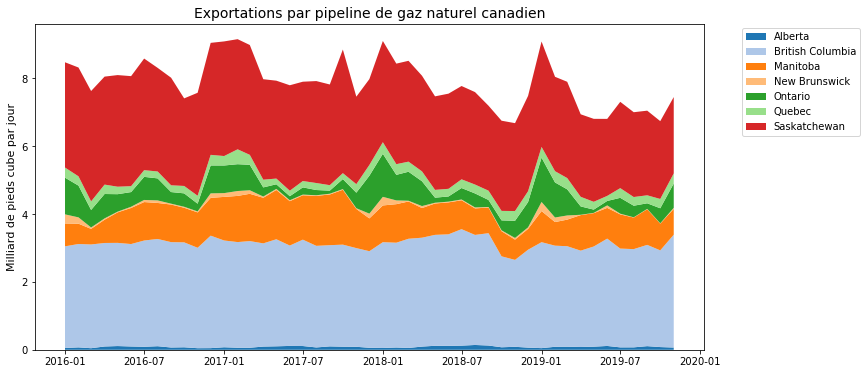

In [42]:
fig, (ax1) = plt.subplots(ncols=1, nrows=1, figsize=(12,6))

ax1.stackplot(df_exports.index, df_exports.drop('Canada', 1).T)
ax1.set_ylabel('Milliard de pieds cube par jour', fontsize=11)
ax1.set_title('Exportations par pipeline de gaz naturel canadien', fontsize=14)
ax1.legend(df_exports.drop('Canada', 1).columns, fontsize=10, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.4); 

Environ la moitié de la production de gaz naturel du Canada est exportée vers différents marchés des États-Unis, par pipeline. Les principales provinces exportatrices sont la Colombie-Britannique, la Saskatchewan et le Manitoba. Les provinces qui produisent peu ou pas de gaz naturel peuvent néanmoins en exporter d’importantes quantités étant donné que les pipelines traversent leur territoire pour atteindre les marchés d’exportation.

#### 4) Autres ensembles de données liés aux exportations de gaz naturel

La base de données sur le commerce international canadien des marchandises renferme également des données sur le volume et la valeur des exportations de gaz naturel selon le partenaire commercial [(lien)](https://www5.statcan.gc.ca/cimt-cicm/home-accueil?lang=fra). Ce rapport repose sur des données commerciales sur base douanière provenant des dossiers administratifs de l’Agence des services frontaliers du Canada et de la Customs Border Protection des États-Unis. Le code du Système harmonisé pour le gaz naturel est 27112100. 

Statistique Canada publie le rapport Approvisionnements et utilisations du gaz naturel (tableau CANSIM 25-10-0055-01) [(lien)](https://www150.statcan.gc.ca/t1/tbl1/fr/tv.action?pid=2510005501&request_locale=fr). Ce rapport mensuel présente des données sur les exportations mensuelles selon la province. Les volumes d’exportations présentés dans le rapport Approvisionnements et utilisations du gaz naturel ont été établis en fonction de données administratives et d’enquêtes.

Dans ces rapports, on utilise une méthode de calcul des importations et des exportations qui diffère de celle qui est employée par la Régie. Par conséquent, les données figurant dans les trois rapports ne sont pas identiques.


### Importations de gaz naturel
#### 1) Principal ensemble de données

De l’information sur l’importation de gaz naturel est accessible à partir du Système de suivi des produits de base de la Régie [(lien)](https://apps.cer-rec.gc.ca/CommodityStatistics/Statistics.aspx?Language=French) ainsi qu’en format bidimensionnel sur le site Web du gouvernement ouvert [(lien)](https://ouvert.canada.ca/data/fr/dataset/b2f35cd0-4e54-4960-bdb1-7b040f5beaa0).

#### 2) Téléverser l’ensemble de données

In [43]:
df_imports = df_trade[df_trade['Flow'] == 'Imports'].pivot_table(index='Date', columns='Province', 
                                                                 aggfunc=np.sum)['Volume (Bcf/d)'].fillna(0)

#### 3) Faire un graphique pour l’ensemble de données

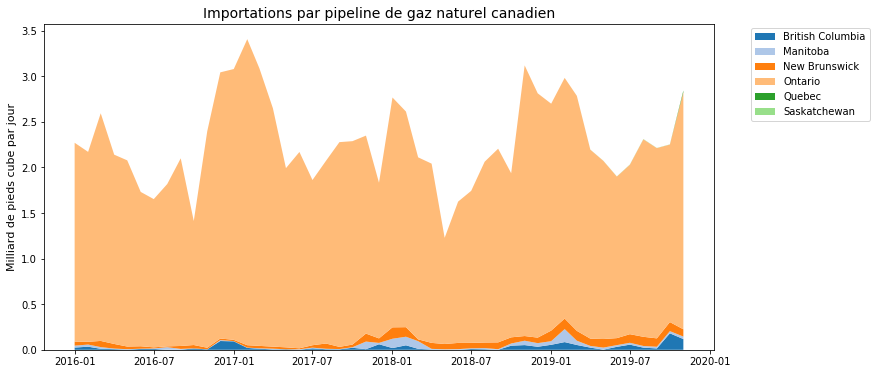

In [44]:
fig, (ax1) = plt.subplots(ncols=1, nrows=1, figsize=(12,6))

ax1.stackplot(df_imports.index, df_imports.drop('Canada', 1).T)
ax1.set_ylabel('Milliard de pieds cube par jour', fontsize=11)
ax1.set_title('Importations par pipeline de gaz naturel canadien', fontsize=14)
ax1.legend(df_imports.drop('Canada', 1).columns, fontsize=10, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.4); 

#### 4) Autres ensembles de données liés aux importations de gaz naturel

La base de données sur le commerce international canadien des marchandises renferme également des données sur le volume et la valeur des importations de gaz naturel selon le partenaire commercial [(lien)](https://www5.statcan.gc.ca/cimt-cicm/home-accueil?lang=fra). Ce rapport repose sur des données commerciales sur base douanière provenant des dossiers administratifs de l’Agence des services frontaliers du Canada et de la Customs Border Protection des États-Unis. Le code du Système harmonisé pour le gaz naturel est 27112100. 

Statistique Canada publie le rapport Approvisionnements et utilisations du gaz naturel (tableau CANSIM 25-10-0055-01) [(lien)](https://www150.statcan.gc.ca/t1/tbl1/fr/tv.action?pid=2510005501&request_locale=fr). Ce rapport mensuel présente des données sur les importations mensuelles selon la province. Les volumes d’importations présentés dans le rapport Approvisionnements et utilisations du gaz naturel ont été établis en fonction de données administratives et d’enquêtes.


### Importations de gaz naturel liquéfié (« GNL »)
#### 1) Principal ensemble de données

La Régie réglemente toutes les importations et exportations de gaz naturel, y compris celles du GNL. Des statistiques sur les importations et les exportations de GNL sont accessibles à partir du Système de suivi des produits de base de la Régie [(lien)](https://apps.cer-rec.gc.ca/CommodityStatistics/Statistics.aspx?Language=French) ainsi qu’en format bidimensionnel sur le site Web du gouvernement ouvert [(lien)](https://ouvert.canada.ca/data/fr/dataset/b2f35cd0-4e54-4960-bdb1-7b040f5beaa0). Le Canada compte un terminal méthanier. L’installation de Saint John, au Nouveau-Brunswick, appelée Canaport, reçoit périodiquement les importations de GNL, généralement en hiver.

#### 2) Téléverser l’ensemble de données

In [45]:
lng_imports_url = 'https://www.cer-rec.gc.ca/open/imports-exports/liquefied-natural-gas-exports-and-imports-detail.csv'
df = pd.read_csv(lng_imports_url, encoding = 'ISO-8859-1')
df = df[(df['Mode of Transportation'] == 'Marine') & (df['Flow'] == 'Imports')]
df = df[['Period', 'Country of Origin', 'Volume (Gas Equivalent) (MCF)', 'Vessel']]#réinitialiser l’indice (drop = True)
df['Period'] = pd.to_datetime(df['Period'], format = '%Y-%m-%d')
df['number of days in month'] = df['Period'].dt.daysinmonth
df['Bcf/d'] = df['Volume (Gas Equivalent) (MCF)'] / df['number of days in month'] /1000000 
df = df.set_index('Period').drop(['number of days in month'], axis = 1)
df = df[df.index.year >= 2016].reset_index()
columns = ['Import Date', 'Exporting Country', 'Bcf', 'Vessel', 'Bcf/d']
df.columns = columns
df['Bcf'] = (df['Bcf']/1000000).round(2)
df['Bcf/d'] = (df['Bcf/d']).round(2)

#### 3) Faire un graphique pour l’ensemble de données

In [46]:
chart = alt.Chart(df, title = 'Monthly LNG imports to Canada').mark_bar(
    size=18
 ).encode(
    x='Import Date:T',
    y='Bcf/d:Q', 
    color='Exporting Country',
    tooltip=['Bcf/d','Bcf', 'Exporting Country', 'Import Date', 'Vessel']
).properties(
    width=760,
    height=300
).interactive().configure_axis(
    labelFontSize=13,
    titleFontSize=13)
chart

alt.Chart(...)

#### 4) Autres ensembles de données liés aux importations de GNL

La base de données sur le commerce international canadien des marchandises renferme également des données sur le volume et la valeur des importations de GNL selon le partenaire commercial [(lien)](https://www5.statcan.gc.ca/cimt-cicm/home-accueil?lang=fra). Ce rapport repose sur des données commerciales sur base douanière provenant des dossiers administratifs de l’Agence des services frontaliers du Canada et de la Customs Border Protection des États-Unis. Le code du Système harmonisé pour le gaz naturel liquéfié est 27111100.

### Appareils de forage en activité
#### 1) Principal ensemble de données
Le nombre d’appareils de forage en activité indique le nombre d’appareils ciblant du gaz et donne une bonne idée des attentes de l’industrie quant à la demande et aux prix du gaz. Ce nombre est fortement influencé par les conditions climatiques et la saison. L’activité est à son plus fort l’hiver, lorsque le sol est gelé et que le déplacement des appareils est possible à peu près partout.

Baker Hughes est une importante société de services d’extraction de pétrole brut et de gaz naturel. Baker Hughes publie le nombre d’appareils de forage en activité en Amérique du Nord dans un rapport hebdomadaire [(lien)](http://phx.corporate-ir.net/phoenix.zhtml?c=79687&p=irol-reportsother). 


#### 2) Téléverser l’ensemble de données

In [47]:
# accéder aux données (sommaire de Baker Hughes)
# ces données sont en format xlsb (Excel binaire)
url_bh = 'https://bakerhughesrigcount.gcs-web.com/na-rig-count'
sheet_rigs = 'Canada Oil & Gas Split'

r = requests.get(url_bh)
if r.status_code == 200:
    soup = bs(r.content, 'lxml')
    url_rigs = soup.find('a', text=re.compile('^North America Rotary Rig Count \(')).get('href')

    r = requests.get(url_rigs)
    if r.status_code == 200:
        data_rigs = []
        with open_workbook(io.BytesIO(r.content)) as wb:
            with wb.get_sheet(sheet_rigs) as ws:
                # régions dans la rangée 6, étiquettes dans la rangée 7, données dans la rangée 8, etc.
                for row in ws.rows():
                    if row[0].r == 6:
                        products = [item.v for item in row]
                    elif row[0].r > 6:
                        data_rigs.append([item.v for item in row])

            products = products[:-2] + [p + ' Percent of Total' for p in products[-2:]]
            df_rigs = pd.DataFrame(data_rigs, columns=products, index=None).dropna(1, 'all').dropna(0, 'all')
            df_rigs['DATE'] = pd.to_datetime(df_rigs['DATE'], unit='d', origin='1899-12-30')
            df_rigs.set_index('DATE', inplace=True)
    else:
        print('Could not access Rig Count Summary file: ', url_rigs)
    df_rigs = df_rigs[(df_rigs.index.year >= 2016)]
else:
    print('Could not access Baker Hughes page: ', url_bh)

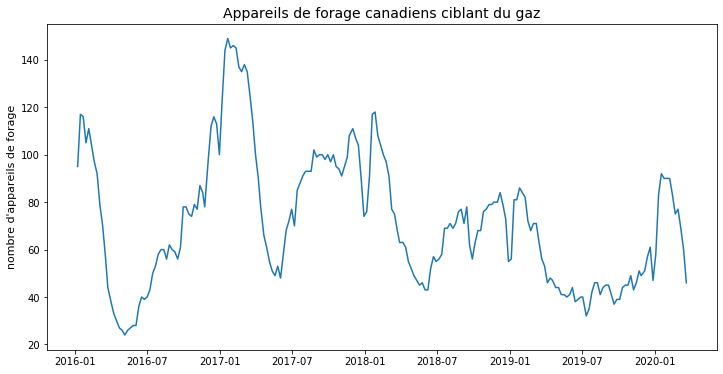

In [48]:
fig, (ax1) = plt.subplots(ncols=1, nrows=1, figsize=(12,6))
ax1.plot(df_rigs.index, df_rigs['GAS']) 
ax1.set_ylabel("nombre d'appareils de forage", fontsize=11)
ax1.set_title('Appareils de forage canadiens ciblant du gaz', fontsize=14);

In [49]:
# accéder aux données (détails de Baker Hughes)
# ces données sont en format xlsb (Excel binaire)
#durée de 2 min
url_bh = 'https://bakerhughesrigcount.gcs-web.com/na-rig-count'
sheet_rigs = 'Master Data'

r = requests.get(url_bh)
if r.status_code == 200:
    soup = bs(r.content, 'lxml')
    url_rigs = soup.find('a', text=re.compile('^North America Rotary Rig Count Pivot Table \(')).get('href')
    r = requests.get(url_rigs)
    if r.status_code == 200:
    
        data_rigs = []
        with open_workbook(io.BytesIO(r.content)) as wb:
            with wb.get_sheet(sheet_rigs) as ws:
                for row in ws.rows():
                    data_rigs.append([item.v for item in row])
        df_rigs = pd.DataFrame(data_rigs[1:], columns=data_rigs[0], index=None).dropna(1, 'all').dropna(0, 'all')
        df_rigs['DATE'] = pd.to_datetime(df_rigs['PublishDate'], unit='d', origin='1899-12-30')
        df_rigs = df_rigs[(df_rigs['Country'] == 'CANADA') & (df_rigs['DrillFor'] == 'Gas') 
                          & (df_rigs['Year'] >= 2016)][['DATE', 'State/Province', 'RigCount']]
        df_rigs = df_rigs.groupby(['DATE', 'State/Province']).sum().reset_index()
        df_rigs = df_rigs.pivot_table(index='DATE', columns='State/Province', aggfunc=np.sum)['RigCount']
    else:
        print('Could not access Rig Count Detail file: ', url_rigs)
else:
    print('Could not access Baker Hughes page: ', url_bh)

#### 3) Faire un graphique pour l’ensemble de données

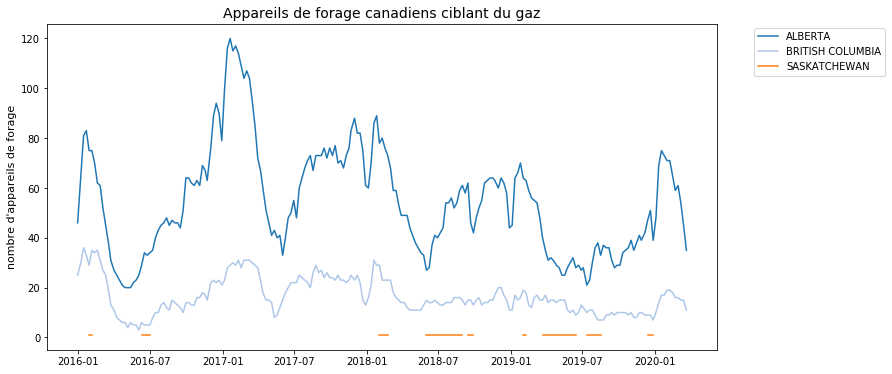

In [50]:
fig, (ax1) = plt.subplots(ncols=1, nrows=1, figsize=(12,6))
ax1.plot(df_rigs.index, df_rigs) 
ax1.set_ylabel("nombre d'appareils de forage", fontsize=11)
ax1.set_title('Appareils de forage canadiens ciblant du gaz', fontsize=14) 
ax1.legend(df_rigs.columns, fontsize=10, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.4); 

Au Canada, c’est en Alberta, d’où provient la majeure partie de la production de gaz naturel canadien, que l’on trouve le plus grand nombre d’appareils de forage. Les activités de forage ont connu une importante baisse depuis 2008, car les sociétés ont délaissé le forage de puits verticaux de faible productivité et ont plutôt opté pour les puits horizontaux à productivité élevée. Les activités de forage ont continué à décroître au fil du temps, car les sociétés ont accru leur efficacité, permettant aux mêmes appareils de forer sur de plus longues distances dans le même délai.

### Projection de l’offre et de la demande de gaz naturel

#### 1) Principal ensemble de données

La Régie de l’énergie du Canada publie le rapport sur l’avenir énergétique [(lien)](https://www.cer-rec.gc.ca/nrg/ntgrtd/ftr/2019/index-fra.html), une projection de l’offre et de la demande énergétiques au Canada jusqu’en 2040. Le rapport comprend des projections de l’offre et de la demande de gaz naturel. Les projections reposent sur des données historiques et comprennent une série d’hypothèses stratégiques, technologiques et commerciales décrites dans le rapport. Le rapport propose des annexes de données [(lien)](https://apps.neb-one.gc.ca/ftrppndc/dflt.aspx?GoCTemplateCulture=fr-CA) et des visualisations interactives [(lien)](https://apps2.cer-rec.gc.ca/dvs/?page=landingPage&) qui permettent d’explorer plus avant l’avenir énergétique du Canada. Le plus récent rapport sur l’avenir énergétique a été publié en décembre 2019.

#### 2) Téléverser l’ensemble de données

In [51]:
# accéder aux données
url_ef = 'https://www.cer-rec.gc.ca/nrg/ntgrtd/ftr/2019/ccssndxplr/fgrs-eng.xlsx'
sheet_gas = '22'
df_ef_gas = pd.read_excel(url_ef, sheet_name=sheet_gas, header=4, index_col=0).rename(columns = {'Net Exports':'Net Pipeline Exports'})

#### 3) Faire un graphique pour l’ensemble de données

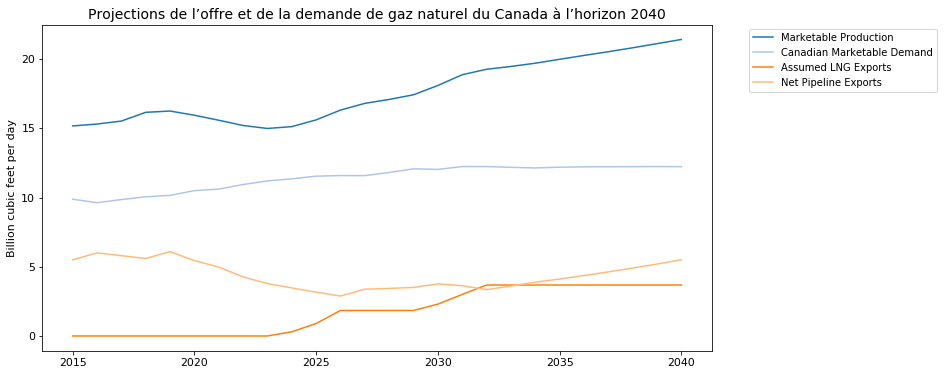

In [52]:
fig, ax = plt.subplots(ncols=1, figsize=(12,6))
ax.plot(df_ef_gas)
ax.set_title('Projections de l’offre et de la demande de gaz naturel du Canada à l’horizon 2040', fontsize = 14)
ax.legend(df_ef_gas.columns, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.4, fontsize = 10) 
ax.set_ylabel('Billion cubic feet per day', fontsize = 11)
ax.tick_params(labelsize = 11);

L’approvisionnement en gaz naturel du Canada devrait provenir principalement de deux provinces, soit l’Alberta et la Colombie-Britannique. Après 2023 toutefois, les exportations nettes reprennent du poil de la bête avec l’accroissement de la production, qui dépasse la croissance de la demande. Et dès 2025, les exportations de gaz naturel liquéfié contribuent à la progression des exportations nettes. D’ici 2040, la production de gaz naturel au Canada devrait atteindre 21 milliards de pieds cubes par jour.

#### 4) Autres ensembles de données liés aux projections de l’offre et de la demande de gaz naturel au Canada

L’Alberta Energy Regulator publie le rapport ST98, qui fait une projection de la production de gaz naturel en Alberta [(lien)](https://www.aer.ca/providing-information/data-and-reports/statistical-reports/st98). 

Sur la scène internationale, d’autres organismes gouvernementaux et non gouvernementaux et sociétés publient des statistiques sur l’offre et la demande d’énergie à l’échelle mondiale, y compris au Canada, notamment les suivants :  
•	Energy Information Administration des États-Unis – International Energy Outlook 2018 [(lien)](https://www.eia.gov/outlooks/ieo/);  
•	Agence internationale de l’énergie – World Energy Outlook [(lien)](https://www.iea.org/weo/);  
•	Centre de recherche sur l'énergie de l'Asie-Pacifique – Energy Demand and Supply Outlook [(lien)](https://aperc.ieej.or.jp/publications/reports/outlook.php);  
•	BP Energy Outlook [(lien)](https://www.bp.com/en/global/corporate/energy-economics/energy-outlook.html).


## Autres ressources
Veuillez vous reporter à l’inventaire canadien d’information sur l’énergie, une base de données interrogeable maintenue par le gouvernement qui renferme de l’information et des ensembles de données liés à l’énergie au Canada. Cet inventaire contient les adresses URL de plus de 200 ensembles de données concernant la consommation et la production d’énergie au Canada, et on peut y faire des recherches par auteur, produit et catégorie [(lien)](https://public.tableau.com/profile/energy.markets%23!/#!/vizhome/CanadianEnergyInformationInventoryCEII-V2_0/Datasets).

La liste de tous les ensembles de données utilisés dans le présent bloc-notes figure dans l’inventaire. Si vous souhaitez formuler des commentaires sur l’inventaire, veuillez écrire à CEII-ICIE@cer-rec.gc.ca.

L’Association canadienne des producteurs pétroliers publie le guide intitulé Statistical Handbook for Canada’s Upstream Petroleum Industry. Ce résumé historique des progrès réalisés par le secteur du gaz naturel présente un récapitulatif de renseignements statistiques détaillés sur les prix, le forage, les réserves, la production et le commerce [(lien)](https://www.capp.ca/publications-and-statistics/statistics/statistical-handbook). 


In [53]:
authors = ['Margaret Skwara', 'Janna Rodioukova']